# Biomedical 
Needle EMG decomposition algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, iirnotch,lfilter,butter

In [2]:
#loading the dataset
data = np.loadtxt("Data.txt")

In [3]:
#function to plot given data
def plotData(data,xlabel,ylabel,title):
    plt.plot(data);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    plt.show()

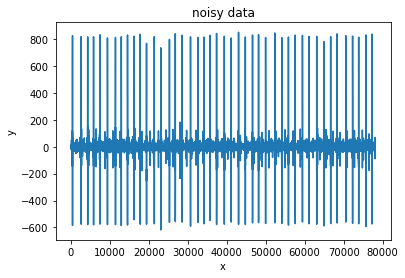

In [4]:
#plotting raw noisy data
plotData(data,"x","y","noisy data")

## Step 1: Rectify Data

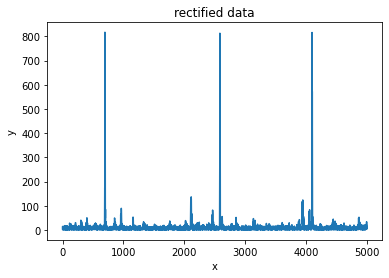

In [5]:
rectifiedData=np.abs(data)
plotData(rectifiedData[30000:35000],"x","y","rectified data")

## Step 2: Smooth data to avoid false detection

In [6]:
def smoothN(N,data):
    out= np.zeros((data.size))
    for i in range(N-1,data.size):
        s=0
        for j in range(-(N-1),1):
            s += data[(i + j)]
        ss = (1/N) * s
        out[i] = ss
    plotData(out,"x","y","Detect "+ str(N))
    return out   

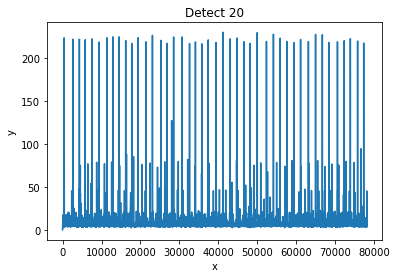

In [7]:
averagedData=smoothN(20,rectifiedData)

## Step 3: Detecting and plotting MUAP templates

In [8]:
def muapDetect(data,thresh):
    
    for i in range(0,data.size):
        if(data[i]<thresh):
            return False
    return True

In [9]:
def threshold(data,T,thresh,originalData):
    out=np.zeros((data.size))
    c=0
    print(thresh)
    i=0
    positions = np.zeros(0)
    start = 0
    end = 0
    while(i < data.size):
        if(data[i]>=thresh):
            if(muapDetect(data[i:i+T],thresh)):
                start = i
                c+=1
                out[i:i+T]=data[i:i+T]
                i+=T
                while(data[i+1]>=thresh):
                    out[i]=data[i]
                    i+=1
                end = i
                maximumIndex = np.argmax(originalData[start:end])
                positions= np.append(positions,maximumIndex+start)
        i+=1        
    print("Count: ",c)
    plotData(out,"x","y","threshold data")
    return out,positions

11.7
Count:  293


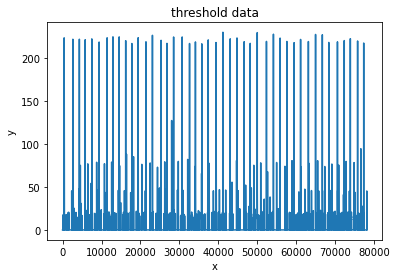

In [10]:
thresh=3*np.std(rectifiedData[0:100])

threshData,positions= threshold(averagedData,20,11.7,data)


In [11]:
def templateDetect(data,diffTh,positions):
    out=np.zeros((positions.size,20))#ks  
    col = np.zeros((positions.size))
    tempfound=0
    for i in range(0,positions.size):
        p= positions[i]
        s=p-10
        e= p+10
        m= data[int(s):int(e)]
        if(i==0):
            out[0]=m
            print("temp ", tempfound, " m ",m)
            plotData(m,"x","y","template 1")
            tempfound=1
        else:
            same= False
            for j in range(0,tempfound):
                D=0
                k= out[j]
                for l in range(0,20):
                    D+=(m[l]-k[l])**2
                
                if(D<diffTh):
                    same=True
                    
                    out[j]=(out[j]+m)/2     
                    break
            if(not(same)):
                out[tempfound]=m
                print("temp ", tempfound, " m ",m)
                plotData(m,"x","y",("template "+str(tempfound+1)))
                tempfound+=1   
    return out

temp  0  m  [ -7.9522    3.3009    0.76675 -22.786   -10.34    -16.141   -16.12
   3.3434   22.907    40.585    48.508    36.515    31.975     7.1838
   1.2249    4.1878  -15.994    -1.2169  -13.275    -6.3172 ]


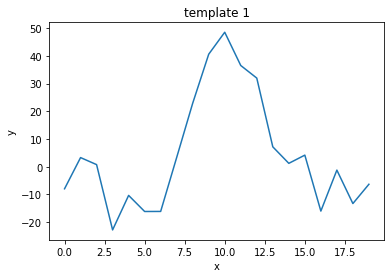

temp  1  m  [  49.882    25.814    35.468    19.944    12.671   -12.888   -55.11
 -128.92   -122.24    343.99    825.4     684.43    149.43   -354.59
 -585.51   -530.72   -327.41   -117.64      6.6174   61.301 ]


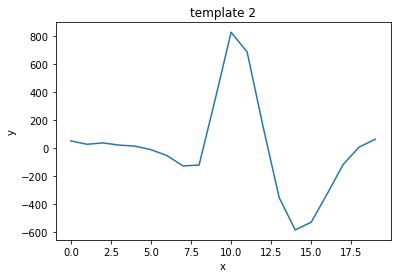

temp  2  m  [  -5.1773  -15.38     -9.4605  -12.492   -40.946   -46.711   -94.806
 -188.08     60.055   631.23    819.31    433.51   -123.13   -515.82
 -575.92   -428.89   -220.04    -48.289    38.673    69.628 ]


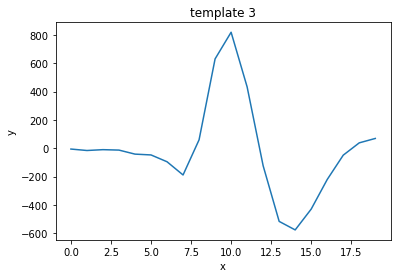

In [12]:
temp=templateDetect(data,(12)**5,positions)
